In [1]:
import pandas as pd
import pyproj
import verde as vd
import harmonica as hm
import bordado as bd
import numpy as np
import pygmt
import rioxarray

In [2]:
df_corr= pd.read_csv('marco-mag/data/Magnetometry/merged_data/can_mag_corr.csv')
df_corr

/tmp/ipykernel_14922/707038318.py:1: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_corr= pd.read_csv('marco-mag/data/Magnetometry/merged_data/can_mag_corr.csv')


,Reading_Date,Reading_Time,Magnetic_Field,Signal_Quality,Depth,Leak,Measurement_Time,Signal_Strength,Gradient_Condition,Weak_Signal,...,IGRF_F,IGRF_Dec,IGRF_Inc,IGRF_bx,IGRF_by,IGRF_bz,IGRF_nn_dist_deg,diurnal_proj_nT,Magnetic_Field_poly_corr,AMF
0,20-Aug-2025,17:36:36.700,22759.127,79,0.0,0,215,119,NaN,NaN,...,22618.5,-20.97884,-40.78664,0.706958,-0.271075,-0.653245,0.039767,-18.866356,22777.993356,159.493356
1,20-Aug-2025,17:36:37.200,22757.742,79,0.0,0,215,122,NaN,NaN,...,22618.5,-20.97884,-40.78664,0.706958,-0.271075,-0.653245,0.039767,-18.867653,22776.609653,158.109653
2,20-Aug-2025,17:36:37.700,22756.970,89,0.0,0,215,129,NaN,NaN,...,22618.5,-20.97884,-40.78664,0.706958,-0.271075,-0.653245,0.039769,-18.868951,22775.838951,157.338951
3,20-Aug-2025,17:36:38.700,22753.489,89,0.0,0,215,133,NaN,NaN,...,22618.5,-20.97884,-40.78664,0.706958,-0.271075,-0.653245,0.039771,-18.871546,22771.816836,153.316836
4,20-Aug-2025,17:36:39.200,22750.916,89,0.0,0,215,134,NaN,NaN,...,22618.5,-20.97884,-40.78664,0.706958,-0.271075,-0.653245,0.039772,-18.872844,22769.888898,151.388898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79341,21-Aug-2025,18:00:45.200,22585.829,89,0.0,0,215,129,NaN,NaN,...,22630.2,-21.04502,-40.78059,0.706711,-0.271916,-0.653163,0.036349,-21.975405,22607.804405,-22.395595
79342,21-Aug-2025,18:00:45.700,22585.503,89,0.0,0,215,133,NaN,NaN,...,22630.2,-21.04502,-40.78059,0.706711,-0.271916,-0.653163,0.036350,-21.981188,22607.484188,-22.715812
79343,21-Aug-2025,18:00:46.200,22585.352,89,0.0,0,215,133,NaN,NaN,...,22630.2,-21.04502,-40.78059,0.706711,-0.271916,-0.653163,0.036352,-21.986971,22607.338971,-22.861029
79344,21-Aug-2025,18:00:46.700,22584.775,89,0.0,0,215,133,NaN,NaN,...,22630.2,-21.04502,-40.78059,0.706711,-0.271916,-0.653163,0.036353,-21.992755,22606.767755,-23.432245


In [3]:
df_corr.isna().sum()
df_corr.dropna(subset=["AMF"], inplace=True)
df_corr.dropna(subset=["Mag_Northing"], inplace=True)
df_corr.dropna(subset=["Mag_Easting"], inplace=True)
df_corr.dropna(subset=["Depth"], inplace=True)


In [4]:
northing = df_corr.Mag_Northing
easting = df_corr.Mag_Easting
altitude = df_corr.Depth

coordinates = (easting, northing, altitude)

In [5]:
regiao = bd.get_region((easting,northing))
(regiao[3]-regiao[2])/20

753.9174999999814

In [6]:
eqs = hm.EquivalentSourcesGB(
    depth=9e3, damping=10, block_size=0.5e3, window_size=1e3, random_state=42
)
eqs.estimate_required_memory(coordinates)

/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/verde/blockreduce.py:179: FutureWarning: The provided callable <function median at 0x7d6d542e8ae0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  blocked = pd.DataFrame(columns).groupby("block").aggregate(reduction)
/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/verde/blockreduce.py:236: FutureWarning: The provided callable <function median at 0x7d6d542e8ae0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  grouped = table.groupby("block").aggregate(self.reduction)


np.int64(277696)

In [7]:
pred_points = eqs.fit(coordinates, df_corr.AMF)

/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/harmonica/_equivalent_sources/gradient_boosted.py:224: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  data = data.ravel()
/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/verde/blockreduce.py:179: FutureWarning: The provided callable <function median at 0x7d6d542e8ae0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  blocked = pd.DataFrame(columns).groupby("block").aggregate(reduction)
/home/gabriel/anaconda3/envs/labgeo/lib/python3.11/site-packages/verde/blockreduce.py:236: FutureWarning: The provided callable <function median at 0x7d6d542e8ae0> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used dire

In [8]:
spacing = 25.0  # meters
e_grid, n_grid = vd.grid_coordinates(regiao, spacing=spacing)  # 2D arrays
up_grid = np.full(e_grid.size, 0.0, dtype=np.float32)          # predict at z=0 m
coords_grid = (e_grid.ravel(), n_grid.ravel(), up_grid)

pred_grid = eqs.predict(coords_grid).reshape(e_grid.shape)

# wrap as xarray
grid = vd.make_xarray_grid(
    data=pred_grid,
    coordinates=(e_grid, n_grid),
    data_names="AMF_ES",
    # extra_coords={"upward": 0.0}, # Removed extra_coords
)
grid

<xarray.Dataset> Size: 117MB
Dimensions:   (northing: 604, easting: 24221)
Coordinates:
  * northing  (northing) float64 5kB 7.223e+06 7.223e+06 ... 7.238e+06 7.238e+06
  * easting   (easting) float64 194kB 1.972e+05 1.973e+05 ... 8.028e+05
Data variables:
    AMF_ES    (northing, easting) float64 117MB 752.4 752.4 ... -135.1 -135.5

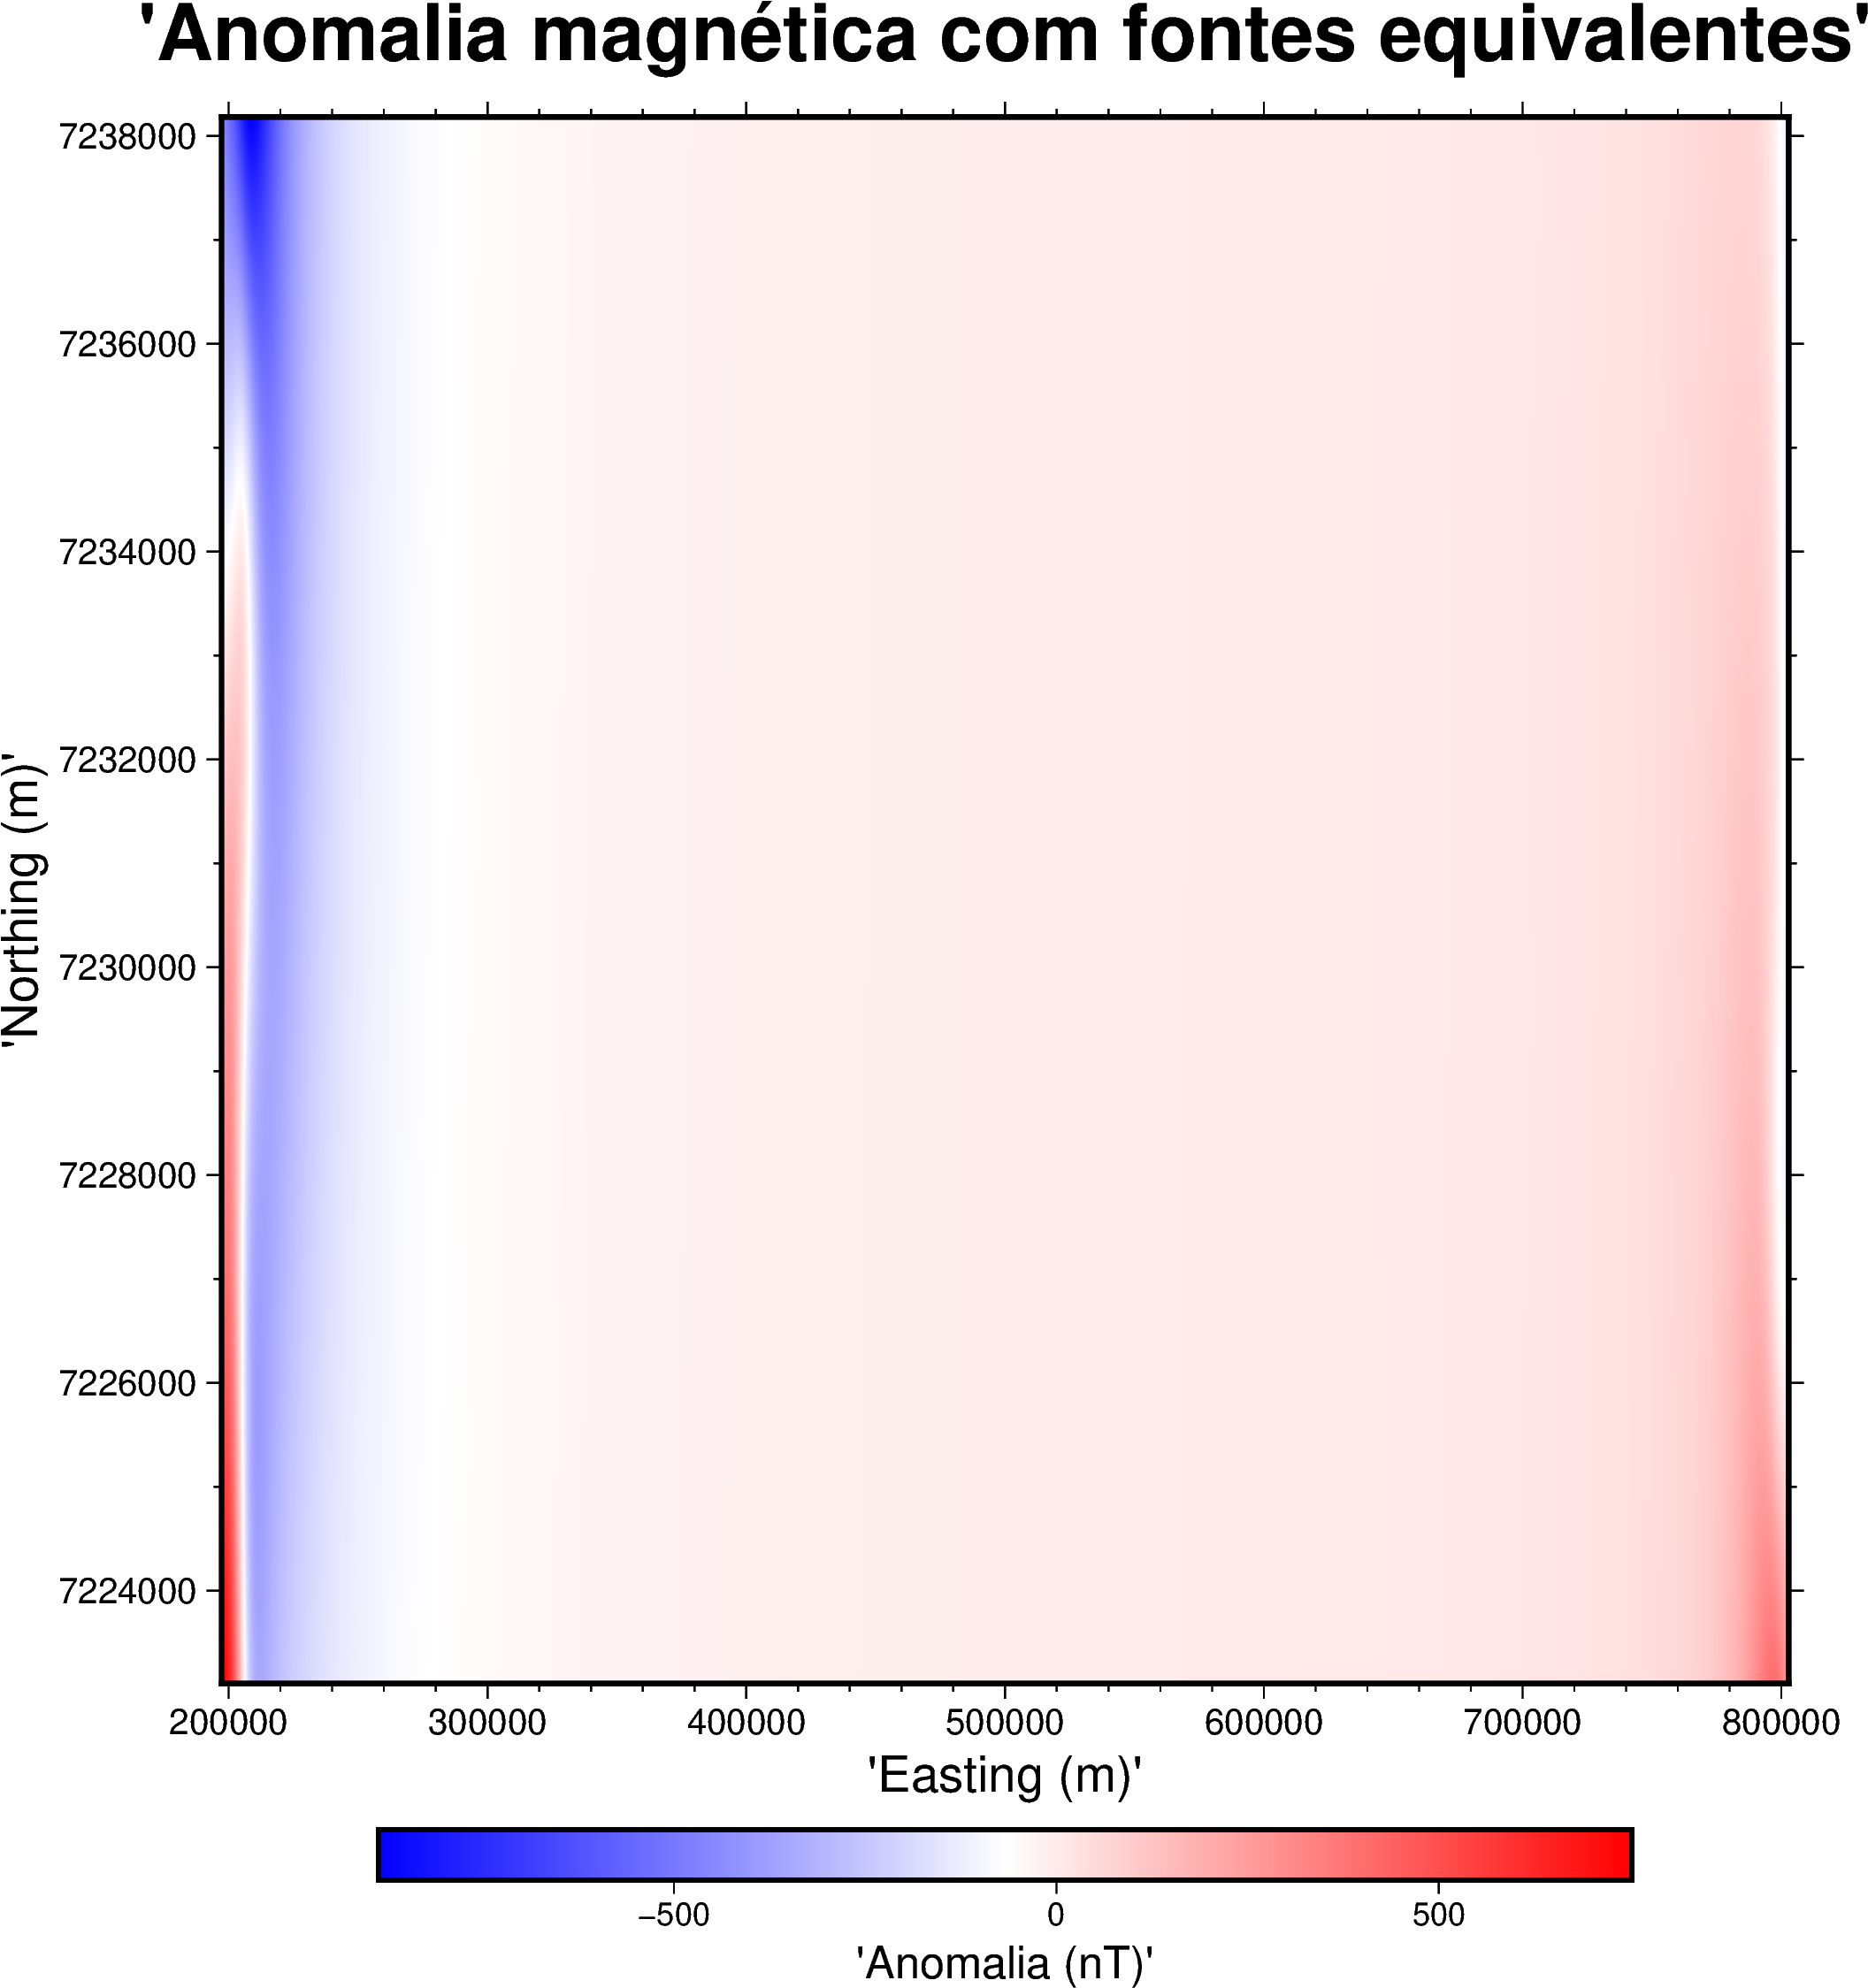

In [16]:
fig = pygmt.Figure()



# grid
fig.grdimage(
    grid = grid.AMF_ES,
    region = regiao,
    projection = 'X15c',
    cmap = 'polar',
    nan_transparent = True,
)

# moldura (basemap)
fig.basemap(
    region = regiao,
    frame = [
        "af",
        "WSen+t'Anomalia magnética com fontes equivalentes'", # West, South, east, north, maiusculas escreve na borda
        "x+l'Easting (m)'",
        "y+l'Northing (m)'",       
    ]
)

fig.colorbar(
    frame = ["a+l'Anomalia (nT)'"]
)

fig.show()

In [ ]:
grid = grid.rename({'easting':'x', 'northing':'y'})
grid.rio.set_spatial_dims('x','y', inplace = True)

In [14]:
grid.rio.write_crs('EPSG:32723', inplace = True)
output = ('anomalia_mag_cananeia.tif')

grid.rio.to_raster(output)

output

'anomalia_mag_cananeia.tif'